<a href="https://colab.research.google.com/github/Muskan520/Stock-prediction-models/blob/main/LSTM_Asian_Paints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Predicting adjusting stock price using lstm

In [ ]:
import math
import numpy as np
import pandas_datareader as web 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#get data Asian Paints
df=web.DataReader('ASIANPAINT.NS',data_source='yahoo', start='2011-01-01',end='2021-06-07')
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,293.739990,286.005005,289.799988,287.454987,454300.0,263.452148
2011-01-04,289.899994,282.600006,289.899994,283.619995,249220.0,259.937408
2011-01-05,289.500000,283.024994,288.000000,288.049988,710350.0,263.997467
2011-01-06,289.399994,284.250000,288.200012,284.950012,149280.0,261.156311
2011-01-07,286.790009,276.135010,284.954987,277.575012,498710.0,254.397095
...,...,...,...,...,...,...
2021-06-02,2933.750000,2877.149902,2918.850098,2903.699951,2067842.0,2889.396240
2021-06-03,2942.000000,2904.050049,2919.600098,2935.350098,1404434.0,2920.890381
2021-06-04,2990.000000,2908.000000,2953.000000,2924.899902,1509084.0,2910.491699


In [ ]:
df.shape

(2567, 6)

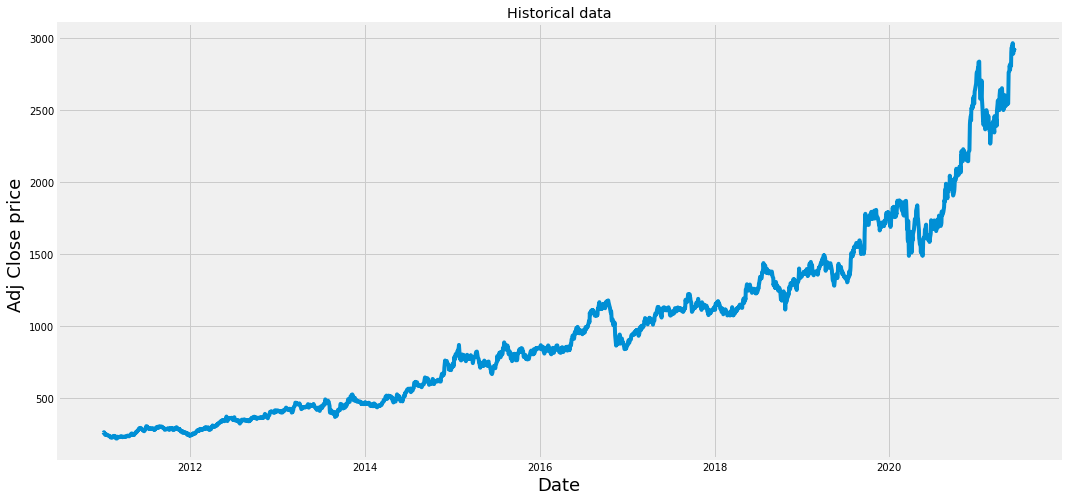

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Historical data')
plt.plot(df['Adj Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close price ',fontsize=18)
plt.show()


In [ ]:
data=df.filter(['Adj Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

2054

In [ ]:
#scale the data
scaler= MinMaxScaler(feature_range=(0, 1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.01583351],
       [0.01455207],
       [0.01603232],
       ...,
       [0.98091698],
       [0.983892  ],
       [0.98140681]])

In [ ]:
#creatitg training data set
#creating scaled training data set
train_data= scaled_data[0:training_data_len,:]
#split in x train and y train
x_train=[]
y_train=[]
 
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01583351, 0.01455207, 0.01603232, 0.01499647, 0.01253213,
       0.00925752, 0.01011291, 0.01087977, 0.01046043, 0.01086642,
       0.00875962, 0.00848898, 0.0089434 , 0.00914224, 0.00878136,
       0.00735957, 0.0066545 , 0.00666118, 0.00596116, 0.00590769,
       0.00291374, 0.00283187, 0.00236908, 0.00285861, 0.00336985,
       0.00263641, 0.00248938, 0.00277507, 0.0032696 , 0.0066595 ,
       0.00625521, 0.00547163, 0.00648578, 0.00662945, 0.00568381,
       0.00365555, 0.0025846 , 0.00035585, 0.00019379, 0.        ,
       0.00441405, 0.00458614, 0.00359372, 0.0034918 , 0.0033214 ,
       0.00335147, 0.00331972, 0.00430879, 0.00425869, 0.0043606 ,
       0.00509573, 0.0059645 , 0.00486515, 0.00410832, 0.00364552,
       0.00484678, 0.00341328, 0.00429543, 0.00423361, 0.00384769])]
[0.004527675474892939]

[array([0.01583351, 0.01455207, 0.01603232, 0.01499647, 0.01253213,
       0.00925752, 0.01011291, 0.01087977, 0.01046043, 0.01086642,
       0.00875962, 0.00848898, 0.0

In [ ]:
#convert x_train & y_train to numpy
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1994, 60, 1)

In [ ]:
#build the lstm model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

1994/1994 [==============================] - 70s 25ms/step - loss: 7.7217e-04


In [ ]:
#Create the testing data set
#Create a new array contaiing scaled values from index 2040 to 2624
test_data=scaled_data[training_data_len-60:,:]
#create the x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]    #want our model to predict
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])   #past 60 values

In [ ]:
#convert data to numpy array
x_test=np.array(x_test)


In [ ]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#x_test

In [ ]:
#get the models preddicted values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [ ]:
#Get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

172.54161654127054

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


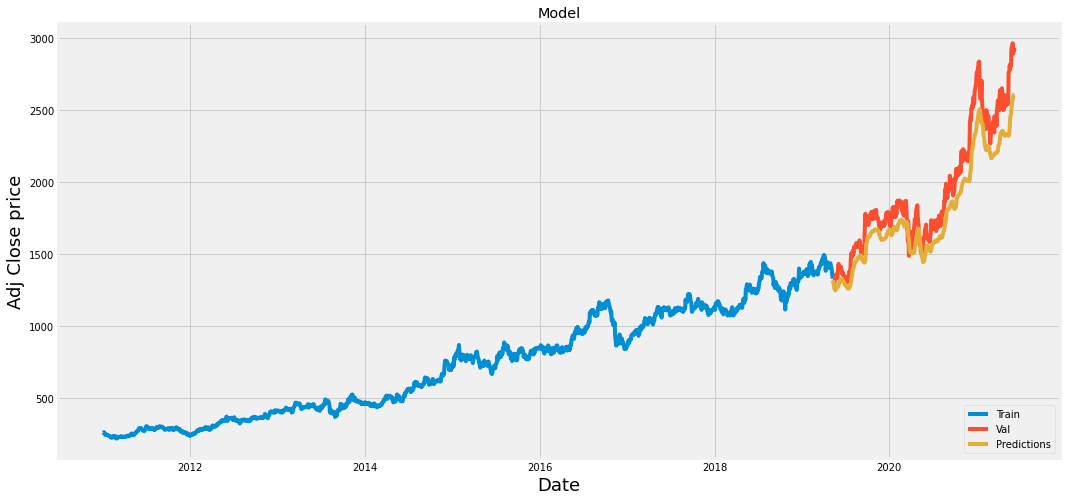

In [ ]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visu;aize the model
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj Close price',fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()


In [ ]:
#Show the valid and predicted prices
valid


,Adj Close,Predictions
Date,,
2019-05-10,1316.353394,1317.198608
2019-05-13,1307.960693,1304.677246
2019-05-14,1295.936279,1292.060303
2019-05-15,1281.899658,1279.572021
2019-05-16,1280.378174,1267.111328
...,...,...
2021-06-02,2889.396240,2598.316162
2021-06-03,2920.890381,2601.220459
2021-06-04,2910.491699,2604.084473


In [ ]:
#Get the quote
vy_quote=web.DataReader('ASIANPAINT.NS',data_source='yahoo', start='2011-01-01',end='2021-06-07')
#create a new data frame
new_df=vy_quote.filter(['Adj Close'])
#Get the last 60 days closing price values and convert the data frame to array
last_60_days=new_df[-60:].values
#Scale the data
last_60_days_scaled=scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert X_test to numpy array
X_test=np.array(X_test)
#Reshape to 3 dim
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled prixes
pred_price=model.predict(X_test)
#Undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


[[2606.639]]


In [ ]:
#Get the Actual data
vy_quote2=web.DataReader('ASIANPAINT.NS',data_source='yahoo', start='2021-06-08',end='2021-06-08')
print(vy_quote2['Adj Close'])


Date
2021-06-08    2911.835205
2021-06-09    2929.050049
Name: Adj Close, dtype: float64
